# Starting off:

### In machine learning what is the difference between an  algorithm and a model?







# Reducing Loss with Gradient Descent





Agenda:

- Logic of Gradient Descent
- Determining the Gradient
- Learning Rate
- Quick Practice
- Batches, Epochs and Iterations
- Google Playground

The goal of fitting a model is to minimize our cost function, also referred to as loss.

Earlier we showed how you can use linear algebra to determine the coeeficients that would minimize loss for a linear regression model. This is not possible with all models or data sets.  

Instead we would like to take an interative approach called **gradient descent**.



## Marco Polo

Think of **gradient descent** as a game of Marco Polo: 
- You pick a starting point for your weights, then you call out to the data and it gives you some feedback (loss). 
- After you get that feedback you update your position and get more feedback.
- You repeat this process until you get as close as possible.

<img src='./resources/GradientDescentDiagram.svg' width=500 />

### How do we 'compute parameter updates' 

Suppose we had the time and the computing resources to calculate the loss for all possible values of . For the kind of regression problems we've been examining, the resulting plot of loss vs.  will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:


<img src='./resources/convex.svg' width=500 />

The **gradient descent algorithm** then calculates the gradient of the loss curve at the starting point. 

The gradient of loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." 

<img src='./resources/GradientDescentNegativeGradient.svg' width=500 />

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Since gradient is a vector, so it has both of the following characteristics:

- a direction
- a magnitude

Here is the idea of gradient descent in multiple deminsions. 

<img src='./resources/hilldescent.png' width=500 />



### Partial Derivatives of the cost function

![alt text](gdformula.png)



### Gradient vector of the cost function

![alt text](vectorofpartialderivative.png)

We understand which direction we want to take a step in, but how big of a step should we take?

<img src='./resources/GradientDescentGradientStep.svg' width=500 />


## Learning Rate

Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

The size of the step is a ***hyperparameter*** that we can choose. 


### Too Small
<img src='./resources/LearningRateTooSmall.svg' width=500 />


### Too Big

<img src='./resources/LearningRateTooLarge.svg' width=500 />


### Just Right

<img src='./resources/LearningRateJustRight.svg' width=500 />


### What is the appropriate learning rate?

The ideal learning rate in one-dimension is  (the inverse of the second derivative of f(x) at x).

The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

#### It is complex to figure out, so let's just try multiple ones and see which one works best.

### Number of Epochs 

Epochs is anoter hyperparamenter you can 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [2]:
def gradientDescent(x, y, theta, alpha, m, numEpochs):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numEpochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
        print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])

In [3]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [8]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 100)
m, n = np.shape(x)

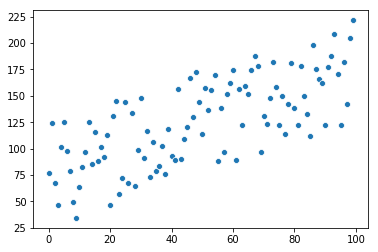

In [9]:
sns.scatterplot(x=x[:,1], y=y)

Iteration 0 | Cost: 1684.794041
[1.90595185 1.5342646 ]
Iteration 1 | Cost: 1372.086119
[1.91075154 1.72763218]
Iteration 2 | Cost: 1231.031143
[1.91459358 1.85748376]
Iteration 3 | Cost: 1167.393961
[1.91779248 1.94467955]
Iteration 4 | Cost: 1138.673249
[1.92055943 2.00322877]
Iteration 5 | Cost: 1125.700337
[1.92303629 2.04253966]
Iteration 6 | Cost: 1119.829895
[1.92531831 2.06893056]
Iteration 7 | Cost: 1117.162764
[1.92746947 2.08664471]
Iteration 8 | Cost: 1115.940370
[1.92953273 2.09853177]
Iteration 9 | Cost: 1115.369574
[1.93153694 2.1065055 ]
Iteration 10 | Cost: 1115.092658
[1.93350148 2.11185114]
Iteration 11 | Cost: 1114.948286
[1.93543936 2.11543181]
Iteration 12 | Cost: 1114.863695
[1.93735933 2.11782717]
Iteration 13 | Cost: 1114.806067
[1.93926724 2.11942652]
Iteration 14 | Cost: 1114.760601
[1.94116705 2.12049127]
Iteration 15 | Cost: 1114.720620
[1.9430614  2.12119701]
Iteration 16 | Cost: 1114.683115
[1.94495207 2.12166164]
Iteration 17 | Cost: 1114.646727
[1.94684

Iteration 269 | Cost: 1105.764303
[2.41989307 2.11550956]
Iteration 270 | Cost: 1105.729284
[2.4217642  2.11548135]
Iteration 271 | Cost: 1105.694267
[2.42363529 2.11545314]
Iteration 272 | Cost: 1105.659252
[2.42550633 2.11542493]
Iteration 273 | Cost: 1105.624238
[2.42737732 2.11539672]
Iteration 274 | Cost: 1105.589226
[2.42924827 2.11536852]
Iteration 275 | Cost: 1105.554216
[2.43111917 2.11534031]
Iteration 276 | Cost: 1105.519208
[2.43299002 2.1153121 ]
Iteration 277 | Cost: 1105.484201
[2.43486082 2.1152839 ]
Iteration 278 | Cost: 1105.449196
[2.43673157 2.11525569]
Iteration 279 | Cost: 1105.414193
[2.43860228 2.11522749]
Iteration 280 | Cost: 1105.379192
[2.44047294 2.11519929]
Iteration 281 | Cost: 1105.344193
[2.44234355 2.11517108]
Iteration 282 | Cost: 1105.309195
[2.44421412 2.11514288]
Iteration 283 | Cost: 1105.274199
[2.44608464 2.11511468]
Iteration 284 | Cost: 1105.239205
[2.44795511 2.11508648]
Iteration 285 | Cost: 1105.204213
[2.44982553 2.11505828]
Iteration 286 

Iteration 469 | Cost: 1098.795751
[2.79317694 2.10988173]
Iteration 470 | Cost: 1098.761085
[2.79503861 2.10985366]
Iteration 471 | Cost: 1098.726422
[2.79690022 2.1098256 ]
Iteration 472 | Cost: 1098.691760
[2.79876179 2.10979753]
Iteration 473 | Cost: 1098.657100
[2.80062332 2.10976946]
Iteration 474 | Cost: 1098.622441
[2.80248479 2.1097414 ]
Iteration 475 | Cost: 1098.587785
[2.80434622 2.10971334]
Iteration 476 | Cost: 1098.553130
[2.8062076  2.10968527]
Iteration 477 | Cost: 1098.518477
[2.80806893 2.10965721]
Iteration 478 | Cost: 1098.483825
[2.80993022 2.10962915]
Iteration 479 | Cost: 1098.449176
[2.81179146 2.10960109]
Iteration 480 | Cost: 1098.414528
[2.81365265 2.10957303]
Iteration 481 | Cost: 1098.379882
[2.8155138  2.10954497]
Iteration 482 | Cost: 1098.345238
[2.81737489 2.10951691]
Iteration 483 | Cost: 1098.310595
[2.81923595 2.10948885]
Iteration 484 | Cost: 1098.275954
[2.82109695 2.10946079]
Iteration 485 | Cost: 1098.241315
[2.8229579  2.10943274]
Iteration 486 

Iteration 785 | Cost: 1087.928571
[3.37911836 2.10104776]
Iteration 786 | Cost: 1087.894457
[3.38096515 2.10101992]
Iteration 787 | Cost: 1087.860345
[3.38281191 2.10099207]
Iteration 788 | Cost: 1087.826235
[3.38465861 2.10096423]
Iteration 789 | Cost: 1087.792126
[3.38650527 2.10093639]
Iteration 790 | Cost: 1087.758019
[3.38835188 2.10090855]
Iteration 791 | Cost: 1087.723914
[3.39019844 2.10088071]
Iteration 792 | Cost: 1087.689810
[3.39204496 2.10085287]
Iteration 793 | Cost: 1087.655708
[3.39389143 2.10082503]
Iteration 794 | Cost: 1087.621608
[3.39573785 2.10079719]
Iteration 795 | Cost: 1087.587510
[3.39758423 2.10076936]
Iteration 796 | Cost: 1087.553413
[3.39943056 2.10074152]
Iteration 797 | Cost: 1087.519318
[3.40127684 2.10071369]
Iteration 798 | Cost: 1087.485225
[3.40312308 2.10068585]
Iteration 799 | Cost: 1087.451133
[3.40496927 2.10065802]
Iteration 800 | Cost: 1087.417044
[3.40681541 2.10063018]
Iteration 801 | Cost: 1087.382956
[3.40866151 2.10060235]
Iteration 802 

Iteration 1064 | Cost: 1078.477592
[3.89256226 2.0933068 ]
Iteration 1065 | Cost: 1078.443958
[3.89439603 2.09327915]
Iteration 1066 | Cost: 1078.410325
[3.89622976 2.09325151]
Iteration 1067 | Cost: 1078.376694
[3.89806344 2.09322386]
Iteration 1068 | Cost: 1078.343065
[3.89989707 2.09319622]
Iteration 1069 | Cost: 1078.309437
[3.90173065 2.09316857]
Iteration 1070 | Cost: 1078.275811
[3.90356419 2.09314093]
Iteration 1071 | Cost: 1078.242187
[3.90539769 2.09311329]
Iteration 1072 | Cost: 1078.208565
[3.90723113 2.09308564]
Iteration 1073 | Cost: 1078.174944
[3.90906453 2.093058  ]
Iteration 1074 | Cost: 1078.141325
[3.91089788 2.09303036]
Iteration 1075 | Cost: 1078.107707
[3.91273119 2.09300272]
Iteration 1076 | Cost: 1078.074092
[3.91456445 2.09297508]
Iteration 1077 | Cost: 1078.040478
[3.91639766 2.09294745]
Iteration 1078 | Cost: 1078.006866
[3.91823083 2.09291981]
Iteration 1079 | Cost: 1077.973255
[3.92006395 2.09289217]
Iteration 1080 | Cost: 1077.939646
[3.92189703 2.0928645

Iteration 1311 | Cost: 1070.221530
[4.34409334 2.08649927]
Iteration 1312 | Cost: 1070.188314
[4.34591565 2.0864718 ]
Iteration 1313 | Cost: 1070.155101
[4.34773792 2.08644433]
Iteration 1314 | Cost: 1070.121889
[4.34956015 2.08641685]
Iteration 1315 | Cost: 1070.088678
[4.35138232 2.08638938]
Iteration 1316 | Cost: 1070.055469
[4.35320445 2.08636191]
Iteration 1317 | Cost: 1070.022262
[4.35502654 2.08633444]
Iteration 1318 | Cost: 1069.989057
[4.35684858 2.08630697]
Iteration 1319 | Cost: 1069.955853
[4.35867057 2.0862795 ]
Iteration 1320 | Cost: 1069.922651
[4.36049251 2.08625203]
Iteration 1321 | Cost: 1069.889451
[4.36231441 2.08622456]
Iteration 1322 | Cost: 1069.856252
[4.36413627 2.0861971 ]
Iteration 1323 | Cost: 1069.823055
[4.36595808 2.08616963]
Iteration 1324 | Cost: 1069.789860
[4.36777984 2.08614216]
Iteration 1325 | Cost: 1069.756667
[4.36960155 2.0861147 ]
Iteration 1326 | Cost: 1069.723475
[4.37142322 2.08608723]
Iteration 1327 | Cost: 1069.690284
[4.37324484 2.0860597

Iteration 1459 | Cost: 1065.323928
[4.61329377 2.08244066]
Iteration 1460 | Cost: 1065.290961
[4.61510926 2.08241329]
Iteration 1461 | Cost: 1065.257995
[4.6169247  2.08238592]
Iteration 1462 | Cost: 1065.225032
[4.61874009 2.08235855]
Iteration 1463 | Cost: 1065.192070
[4.62055544 2.08233118]
Iteration 1464 | Cost: 1065.159110
[4.62237074 2.08230381]
Iteration 1465 | Cost: 1065.126151
[4.624186   2.08227644]
Iteration 1466 | Cost: 1065.093194
[4.62600121 2.08224908]
Iteration 1467 | Cost: 1065.060239
[4.62781637 2.08222171]
Iteration 1468 | Cost: 1065.027285
[4.62963149 2.08219435]
Iteration 1469 | Cost: 1064.994333
[4.63144656 2.08216698]
Iteration 1470 | Cost: 1064.961383
[4.63326159 2.08213962]
Iteration 1471 | Cost: 1064.928434
[4.63507657 2.08211225]
Iteration 1472 | Cost: 1064.895487
[4.6368915  2.08208489]
Iteration 1473 | Cost: 1064.862542
[4.63870639 2.08205753]
Iteration 1474 | Cost: 1064.829599
[4.64052123 2.08203017]
Iteration 1475 | Cost: 1064.796657
[4.64233602 2.0820028

Iteration 1634 | Cost: 1059.580102
[4.93030357 2.07766125]
Iteration 1635 | Cost: 1059.547427
[4.93211101 2.077634  ]
Iteration 1636 | Cost: 1059.514753
[4.93391841 2.07760675]
Iteration 1637 | Cost: 1059.482081
[4.93572576 2.0775795 ]
Iteration 1638 | Cost: 1059.449410
[4.93753307 2.07755225]
Iteration 1639 | Cost: 1059.416741
[4.93934033 2.07752501]
Iteration 1640 | Cost: 1059.384074
[4.94114754 2.07749776]
Iteration 1641 | Cost: 1059.351408
[4.94295471 2.07747052]
Iteration 1642 | Cost: 1059.318745
[4.94476183 2.07744327]
Iteration 1643 | Cost: 1059.286082
[4.94656891 2.07741603]
Iteration 1644 | Cost: 1059.253422
[4.94837594 2.07738878]
Iteration 1645 | Cost: 1059.220763
[4.95018292 2.07736154]
Iteration 1646 | Cost: 1059.188106
[4.95198986 2.0773343 ]
Iteration 1647 | Cost: 1059.155450
[4.95379675 2.07730705]
Iteration 1648 | Cost: 1059.122796
[4.9556036  2.07727981]
Iteration 1649 | Cost: 1059.090144
[4.9574104  2.07725257]
Iteration 1650 | Cost: 1059.057493
[4.95921716 2.0772253

Iteration 1917 | Cost: 1050.398777
[5.43998448 2.06997702]
Iteration 1918 | Cost: 1050.366568
[5.44177899 2.06994997]
Iteration 1919 | Cost: 1050.334360
[5.44357346 2.06992292]
Iteration 1920 | Cost: 1050.302153
[5.44536788 2.06989586]
Iteration 1921 | Cost: 1050.269949
[5.44716225 2.06986881]
Iteration 1922 | Cost: 1050.237745
[5.44895658 2.06984176]
Iteration 1923 | Cost: 1050.205544
[5.45075087 2.06981471]
Iteration 1924 | Cost: 1050.173344
[5.45254511 2.06978765]
Iteration 1925 | Cost: 1050.141146
[5.4543393 2.0697606]
Iteration 1926 | Cost: 1050.108949
[5.45613345 2.06973355]
Iteration 1927 | Cost: 1050.076754
[5.45792755 2.06970651]
Iteration 1928 | Cost: 1050.044561
[5.45972161 2.06967946]
Iteration 1929 | Cost: 1050.012369
[5.46151562 2.06965241]
Iteration 1930 | Cost: 1049.980179
[5.46330958 2.06962536]
Iteration 1931 | Cost: 1049.947991
[5.4651035  2.06959832]
Iteration 1932 | Cost: 1049.915804
[5.46689738 2.06957127]
Iteration 1933 | Cost: 1049.883619
[5.46869121 2.06954423]

Iteration 2208 | Cost: 1041.094398
[5.96027105 2.0621329 ]
Iteration 2209 | Cost: 1041.062660
[5.96205236 2.06210605]
Iteration 2210 | Cost: 1041.030925
[5.96383363 2.06207919]
Iteration 2211 | Cost: 1040.999190
[5.96561485 2.06205234]
Iteration 2212 | Cost: 1040.967458
[5.96739602 2.06202548]
Iteration 2213 | Cost: 1040.935726
[5.96917716 2.06199863]
Iteration 2214 | Cost: 1040.903997
[5.97095824 2.06197178]
Iteration 2215 | Cost: 1040.872269
[5.97273928 2.06194492]
Iteration 2216 | Cost: 1040.840543
[5.97452028 2.06191807]
Iteration 2217 | Cost: 1040.808818
[5.97630123 2.06189122]
Iteration 2218 | Cost: 1040.777095
[5.97808213 2.06186437]
Iteration 2219 | Cost: 1040.745374
[5.97986299 2.06183752]
Iteration 2220 | Cost: 1040.713654
[5.98164381 2.06181068]
Iteration 2221 | Cost: 1040.681936
[5.98342458 2.06178383]
Iteration 2222 | Cost: 1040.650219
[5.9852053  2.06175698]
Iteration 2223 | Cost: 1040.618504
[5.98698598 2.06173013]
Iteration 2224 | Cost: 1040.586791
[5.98876661 2.0617032

Iteration 2615 | Cost: 1028.309373
[6.68154369 2.05125861]
Iteration 2616 | Cost: 1028.278285
[6.6833067  2.05123203]
Iteration 2617 | Cost: 1028.247197
[6.68506967 2.05120545]
Iteration 2618 | Cost: 1028.216112
[6.68683259 2.05117887]
Iteration 2619 | Cost: 1028.185028
[6.68859547 2.05115229]
Iteration 2620 | Cost: 1028.153945
[6.6903583  2.05112571]
Iteration 2621 | Cost: 1028.122864
[6.69212109 2.05109913]
Iteration 2622 | Cost: 1028.091785
[6.69388384 2.05107256]
Iteration 2623 | Cost: 1028.060707
[6.69564654 2.05104598]
Iteration 2624 | Cost: 1028.029631
[6.69740919 2.05101941]
Iteration 2625 | Cost: 1027.998557
[6.6991718  2.05099283]
Iteration 2626 | Cost: 1027.967483
[6.70093437 2.05096626]
Iteration 2627 | Cost: 1027.936412
[6.70269689 2.05093969]
Iteration 2628 | Cost: 1027.905342
[6.70445936 2.05091312]
Iteration 2629 | Cost: 1027.874274
[6.70622179 2.05088655]
Iteration 2630 | Cost: 1027.843207
[6.70798418 2.05085997]
Iteration 2631 | Cost: 1027.812142
[6.70974652 2.0508334

[7.04728896 2.04574443]
Iteration 2824 | Cost: 1021.845985
[7.04904269 2.04571799]
Iteration 2825 | Cost: 1021.815224
[7.05079638 2.04569155]
Iteration 2826 | Cost: 1021.784465
[7.05255003 2.04566511]
Iteration 2827 | Cost: 1021.753707
[7.05430362 2.04563867]
Iteration 2828 | Cost: 1021.722951
[7.05605718 2.04561224]
Iteration 2829 | Cost: 1021.692196
[7.05781069 2.0455858 ]
Iteration 2830 | Cost: 1021.661443
[7.05956416 2.04555936]
Iteration 2831 | Cost: 1021.630692
[7.06131758 2.04553293]
Iteration 2832 | Cost: 1021.599942
[7.06307095 2.04550649]
Iteration 2833 | Cost: 1021.569194
[7.06482429 2.04548006]
Iteration 2834 | Cost: 1021.538447
[7.06657757 2.04545363]
Iteration 2835 | Cost: 1021.507702
[7.06833082 2.04542719]
Iteration 2836 | Cost: 1021.476958
[7.07008402 2.04540076]
Iteration 2837 | Cost: 1021.446216
[7.07183717 2.04537433]
Iteration 2838 | Cost: 1021.415475
[7.07359028 2.0453479 ]
Iteration 2839 | Cost: 1021.384736
[7.07534335 2.04532147]
Iteration 2840 | Cost: 1021.3539

Iteration 3157 | Cost: 1011.688429
[7.63056829 2.0369506 ]
Iteration 3158 | Cost: 1011.658184
[7.63230722 2.03692438]
Iteration 3159 | Cost: 1011.627940
[7.63404611 2.03689816]
Iteration 3160 | Cost: 1011.597698
[7.63578496 2.03687195]
Iteration 3161 | Cost: 1011.567457
[7.63752376 2.03684573]
Iteration 3162 | Cost: 1011.537218
[7.63926252 2.03681952]
Iteration 3163 | Cost: 1011.506980
[7.64100123 2.0367933 ]
Iteration 3164 | Cost: 1011.476744
[7.6427399  2.03676709]
Iteration 3165 | Cost: 1011.446509
[7.64447853 2.03674088]
Iteration 3166 | Cost: 1011.416276
[7.64621711 2.03671467]
Iteration 3167 | Cost: 1011.386044
[7.64795564 2.03668846]
Iteration 3168 | Cost: 1011.355814
[7.64969414 2.03666224]
Iteration 3169 | Cost: 1011.325586
[7.65143259 2.03663604]
Iteration 3170 | Cost: 1011.295359
[7.65317099 2.03660983]
Iteration 3171 | Cost: 1011.265133
[7.65490935 2.03658362]
Iteration 3172 | Cost: 1011.234909
[7.65664767 2.03655741]
Iteration 3173 | Cost: 1011.204687
[7.65838594 2.0365312

Iteration 3364 | Cost: 1005.460236
[7.98958867 2.03153781]
Iteration 3365 | Cost: 1005.430307
[7.9913185  2.03151173]
Iteration 3366 | Cost: 1005.400379
[7.99304828 2.03148565]
Iteration 3367 | Cost: 1005.370453
[7.99477802 2.03145957]
Iteration 3368 | Cost: 1005.340528
[7.99650771 2.0314335 ]
Iteration 3369 | Cost: 1005.310605
[7.99823736 2.03140742]
Iteration 3370 | Cost: 1005.280683
[7.99996697 2.03138134]
Iteration 3371 | Cost: 1005.250762
[8.00169653 2.03135527]
Iteration 3372 | Cost: 1005.220844
[8.00342605 2.03132919]
Iteration 3373 | Cost: 1005.190926
[8.00515552 2.03130312]
Iteration 3374 | Cost: 1005.161011
[8.00688495 2.03127704]
Iteration 3375 | Cost: 1005.131097
[8.00861434 2.03125097]
Iteration 3376 | Cost: 1005.101184
[8.01034368 2.0312249 ]
Iteration 3377 | Cost: 1005.071273
[8.01207298 2.03119883]
Iteration 3378 | Cost: 1005.041363
[8.01380224 2.03117275]
Iteration 3379 | Cost: 1005.011455
[8.01553145 2.03114668]
Iteration 3380 | Cost: 1004.981548
[8.01726062 2.0311206

Iteration 3737 | Cost: 994.401278
[8.63177832 2.02185581]
Iteration 3738 | Cost: 994.371910
[8.63349185 2.02182998]
Iteration 3739 | Cost: 994.342543
[8.63520534 2.02180414]
Iteration 3740 | Cost: 994.313178
[8.63691879 2.02177831]
Iteration 3741 | Cost: 994.283814
[8.63863219 2.02175248]
Iteration 3742 | Cost: 994.254452
[8.64034555 2.02172665]
Iteration 3743 | Cost: 994.225091
[8.64205886 2.02170082]
Iteration 3744 | Cost: 994.195732
[8.64377214 2.02167499]
Iteration 3745 | Cost: 994.166374
[8.64548536 2.02164916]
Iteration 3746 | Cost: 994.137018
[8.64719855 2.02162333]
Iteration 3747 | Cost: 994.107663
[8.64891169 2.0215975 ]
Iteration 3748 | Cost: 994.078310
[8.65062479 2.02157167]
Iteration 3749 | Cost: 994.048958
[8.65233784 2.02154585]
Iteration 3750 | Cost: 994.019607
[8.65405085 2.02152002]
Iteration 3751 | Cost: 993.990259
[8.65576382 2.02149419]
Iteration 3752 | Cost: 993.960911
[8.65747674 2.02146837]
Iteration 3753 | Cost: 993.931565
[8.65918963 2.02144254]
Iteration 3754

Iteration 4126 | Cost: 983.088760
[9.29507236 2.01185563]
Iteration 4127 | Cost: 983.059965
[9.29676907 2.01183005]
Iteration 4128 | Cost: 983.031173
[9.29846573 2.01180447]
Iteration 4129 | Cost: 983.002381
[9.30016235 2.01177889]
Iteration 4130 | Cost: 982.973591
[9.30185892 2.01175331]
Iteration 4131 | Cost: 982.944803
[9.30355545 2.01172774]
Iteration 4132 | Cost: 982.916016
[9.30525194 2.01170216]
Iteration 4133 | Cost: 982.887231
[9.30694839 2.01167658]
Iteration 4134 | Cost: 982.858447
[9.30864479 2.01165101]
Iteration 4135 | Cost: 982.829664
[9.31034115 2.01162543]
Iteration 4136 | Cost: 982.800883
[9.31203747 2.01159986]
Iteration 4137 | Cost: 982.772103
[9.31373374 2.01157428]
Iteration 4138 | Cost: 982.743325
[9.31542997 2.01154871]
Iteration 4139 | Cost: 982.714549
[9.31712616 2.01152314]
Iteration 4140 | Cost: 982.685773
[9.3188223  2.01149756]
Iteration 4141 | Cost: 982.657000
[9.32051841 2.01147199]
Iteration 4142 | Cost: 982.628227
[9.32221446 2.01144642]
Iteration 4143

[9.85265434 2.00344922]
Iteration 4457 | Cost: 973.637225
[9.8543369  2.00342386]
Iteration 4458 | Cost: 973.608911
[9.85601941 2.00339849]
Iteration 4459 | Cost: 973.580597
[9.85770189 2.00337312]
Iteration 4460 | Cost: 973.552286
[9.85938432 2.00334776]
Iteration 4461 | Cost: 973.523975
[9.8610667  2.00332239]
Iteration 4462 | Cost: 973.495666
[9.86274905 2.00329703]
Iteration 4463 | Cost: 973.467359
[9.86443135 2.00327167]
Iteration 4464 | Cost: 973.439053
[9.86611361 2.0032463 ]
Iteration 4465 | Cost: 973.410748
[9.86779582 2.00322094]
Iteration 4466 | Cost: 973.382445
[9.869478   2.00319558]
Iteration 4467 | Cost: 973.354144
[9.87116013 2.00317022]
Iteration 4468 | Cost: 973.325843
[9.87284221 2.00314486]
Iteration 4469 | Cost: 973.297544
[9.87452426 2.0031195 ]
Iteration 4470 | Cost: 973.269247
[9.87620626 2.00309414]
Iteration 4471 | Cost: 973.240951
[9.87788822 2.00306878]
Iteration 4472 | Cost: 973.212657
[9.87957014 2.00304343]
Iteration 4473 | Cost: 973.184363
[9.88125201 2.

[10.45729213  1.99433338]
Iteration 4818 | Cost: 963.508435
[10.45895935  1.99430824]
Iteration 4819 | Cost: 963.480635
[10.46062652  1.99428311]
Iteration 4820 | Cost: 963.452835
[10.46229365  1.99425797]
Iteration 4821 | Cost: 963.425037
[10.46396075  1.99423284]
Iteration 4822 | Cost: 963.397241
[10.46562779  1.9942077 ]
Iteration 4823 | Cost: 963.369446
[10.4672948   1.99418257]
Iteration 4824 | Cost: 963.341652
[10.46896176  1.99415744]
Iteration 4825 | Cost: 963.313860
[10.47062868  1.99413231]
Iteration 4826 | Cost: 963.286069
[10.47229556  1.99410718]
Iteration 4827 | Cost: 963.258280
[10.4739624   1.99408205]
Iteration 4828 | Cost: 963.230492
[10.47562919  1.99405692]
Iteration 4829 | Cost: 963.202705
[10.47729595  1.99403179]
Iteration 4830 | Cost: 963.174920
[10.47896265  1.99400666]
Iteration 4831 | Cost: 963.147136
[10.48062932  1.99398153]
Iteration 4832 | Cost: 963.119354
[10.48229595  1.99395641]
Iteration 4833 | Cost: 963.091573
[10.48396253  1.99393128]
Iteration 4834

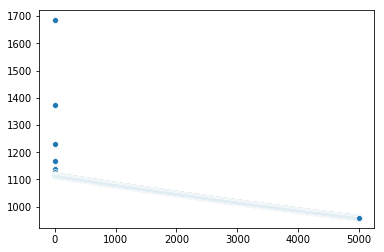

In [10]:
numEpochs= 5000
alpha = 0.0001
theta = np.array([1.90595185,1.5342646])
gradientDescent(x, y, theta, alpha, m, numEpochs)

### Google's Version
https://developers.google.com/machine-learning/crash-course/fitter/graph



#### Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response.

This is called an **adaptive learning rate**.

Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

A function that determines the learning rate at each step is called the *learning schedule*.

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# Applying Gradient Descent

 *Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When doing GD it is important to scale your features to a similiar scale or else it will take the algorithm longer to converge. 

<img src='./resources/scalecontour.png' width=500/>

## Batches

In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. 

### Batch Gradient Descent

* This formula involves caluclations over the full training set X, at each Gradient Descent step. 
* Terribly slow on large number of observations, but scales well with the number of features.
* When training a Linear Regression model with hundreds of thousands of features Gradient Descent is much faster than using linear algebra and the Normal Equation.


### Stochastic Gradient Descent (SGD)

- Picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

- Algorithm is much faster given it has very little data to manipulate. 

- Can be used as an out-of-core algorithm, since it only needs one data observation at a time

When the cost function is very irregular, SGD has a better chance of of finding the global minimum than BGD.
This could be bad because the algorithm will never settle at a minimum.  
One way to avoid this is by reducing the learning rate (step size) as the algorithm progresses. 



### Mini-batch Gradient Descent

At each step, computing the gradietns is based on a small random set of instaces called *mini-batches*.

Mini-batch GD will be less erratic than SGD because it is training on a multiple data instances. 

Faster than Batch GD.

Harder to escape local minima than SGD.

### Epochs

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
One epoch is when an ENTIRE dataset is passed through the model one time.


#### How many epochs should we have?

Train each model along a sufficient number of epochs to see the training loss become stuck in a minimum. 

Many algorithms allow you to set up a parameter so that whenever you see the loss not improve after a number of epochs, it stops.  

### Iterations

**Iterations** is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

### Question:

Why would you use more than 1 epoch when fitting your model?

### Comparison of Types of Gradient Descent

<img src='./resources/comparegdtypes.png' width=600/>

<img src='./resources/algotable.png' width=600/>

<img src='./resources/albotable2.png' width=600/>

https://github.com/ageron/handson-ml.git

https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise